## Trabalho 1 - Variáveis Aleatórias e Processos Estocásticos
### Prof.: C. Alexandre Rolim Fernandes

- Aluno: João Paulo de Abreu Militão
- Matrícula: 494959

In [43]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

### Funções úteis

In [48]:
# Função para carregar o arquivo de áudio
def carregar_audio(caminho_arquivo):
    with wave.open(caminho_arquivo, 'rb') as arquivo_audio:
        # Obter os parâmetros do áudio
        taxa_amostragem = arquivo_audio.getframerate()
        num_frames = arquivo_audio.getnframes()
        duracao = num_frames / taxa_amostragem
        # Ler os dados do áudio
        audio_data = np.frombuffer(arquivo_audio.readframes(num_frames), dtype=np.int16)
    return audio_data, taxa_amostragem, duracao

# Função para plotar o sinal de áudio
def plotar_audio(audio_data, duracao):
    tempo = np.linspace(0, duracao, len(audio_data))
    plt.plot(tempo, audio_data)
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.title('Sinal de Áudio')
    plt.show()

# Função para plotar o histograma do sinal de áudio
def plotar_histograma(audio_data):
    plt.hist(audio_data, bins=50, color='blue', edgecolor='black')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
    plt.title('Histograma do Sinal de Áudio')
    plt.show()

# Função para dividir o sinal de áudio em partes e calcular a média temporal de cada parte
def calcular_medias_temporais(audio_data, num_partes):
    tamanho_parte = len(audio_data) // num_partes
    medias_temporais = []
    for i in range(num_partes):
        inicio = i * tamanho_parte
        fim = inicio + tamanho_parte
        parte_audio = audio_data[inicio:fim]
        media_temporal = np.mean(parte_audio)
        medias_temporais.append(media_temporal)
    return medias_temporais

# Função para dividir o sinal de áudio em partes e calcular a função de autocorrelação de cada parte
def calcular_autocorrelacao_partes(audio_data, num_partes, num_atrasos):
    tamanho_parte = len(audio_data) // num_partes
    autocorrelacoes = []
    for i in range(num_partes):
        inicio = i * tamanho_parte
        fim = inicio + tamanho_parte
        parte_audio = audio_data[inicio:fim]
        autocorrelacao = np.correlate(parte_audio, parte_audio, mode='full')[:num_atrasos+1]
        autocorrelacoes.append(autocorrelacao)
    return autocorrelacoes

## Questão 1

In [45]:
# Caminho do arquivo de áudio
caminho_arquivo = 'botao.wav'

# Carregar o arquivo de áudio
audio_data, _, _ = carregar_audio(caminho_arquivo)

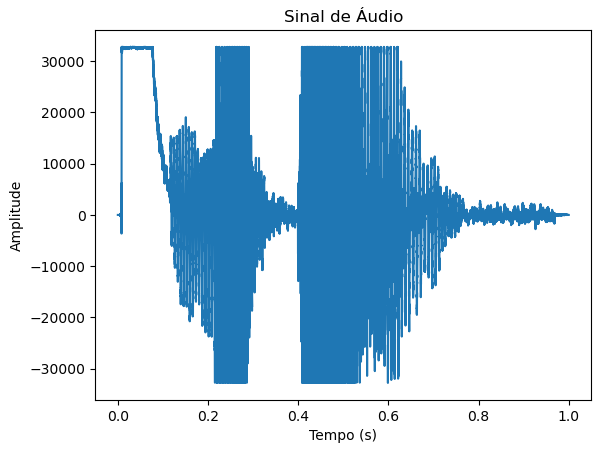

In [49]:

# Plotar o sinal de áudio
plotar_audio(audio_data, 1)

## Questão 2

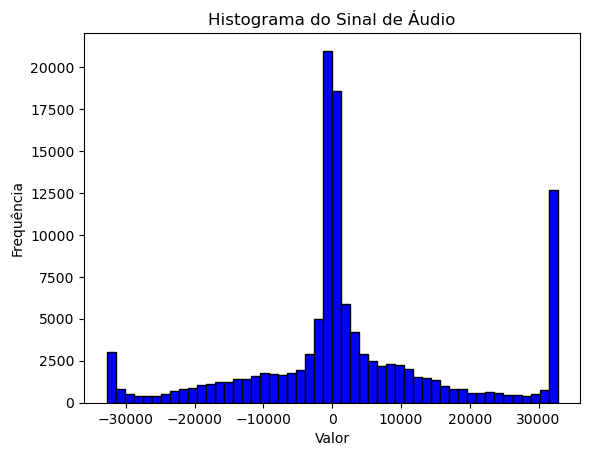

In [ ]:
# Gerar e plotar o histograma do sinal de áudio
plotar_histograma(audio_data)

## Questão 3

In [13]:
# Calcular a assimetria (skewness) e a curtose (kurtosis) do sinal de áudio
assimetria = skew(audio_data)
curtose = kurtosis(audio_data)

# Exibir os resultados
print(f'Assimetria (Skewness): {assimetria}')
print(f'Curtose (Kurtosis): {curtose}')

'''Os valores de assimetria e curtose obtidos a partir do áudio de uma voz masculina pronunciando a palavra "botão" são consistentes com as expectativas. A assimetria próxima de zero indica uma distribuição simétrica dos dados do sinal de áudio, enquanto a curtose positiva sugere uma concentração dos valores em torno da média. Esses resultados são coerentes com a natureza da gravação, onde a pronúncia de uma palavra por uma voz masculina tende a resultar em uma distribuição de valores do sinal de áudio mais simétrica e concentrada.'''

Assimetria (Skewness): 0.24632510251907466
Curtose (Kurtosis): 0.3732930716904437


'Os valores de assimetria e curtose obtidos a partir do áudio de uma voz masculina pronunciando a palavra "botão" são consistentes com as expectativas. A assimetria próxima de zero indica uma distribuição simétrica dos dados do sinal de áudio, enquanto a curtose positiva sugere uma concentração dos valores em torno da média. Esses resultados são coerentes com a natureza da gravação, onde a pronúncia de uma palavra por uma voz masculina tende a resultar em uma distribuição de valores do sinal de áudio mais simétrica e concentrada.'

## Questão 4

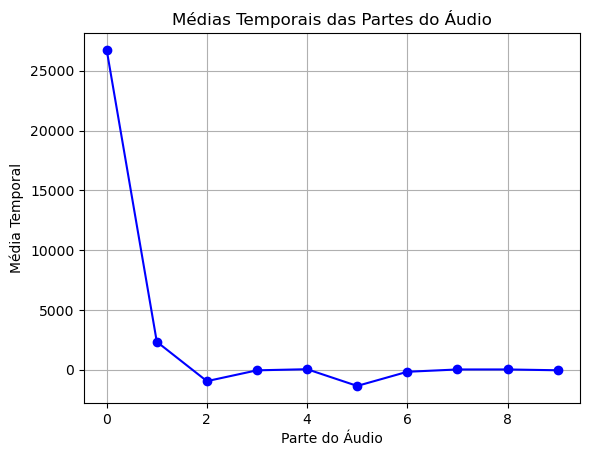

In [15]:
# Dividir o sinal de áudio em 10 partes de aproximadamente 6.000 amostras e calcular a média temporal de cada parte
medias_temporais = calcular_medias_temporais(audio_data, num_partes=10)

# Plotar as médias temporais em um gráfico de linha
plt.plot(medias_temporais, marker='o', color='blue')
plt.xlabel('Parte do Áudio')
plt.ylabel('Média Temporal')
plt.title('Médias Temporais das Partes do Áudio')
plt.grid(True)
plt.show()

## Questão 5

In [52]:
num_atrasos = 20

# Calcular a função de autocorrelação para cada parte do sinal
autocorrelacoes = calcular_autocorrelacao_partes(audio_data, num_partes, num_atrasos)

# Verificar se a autocorrelação é a mesma para todas as partes
autocorr_same = all(np.allclose(autocorrelations[0], autocorr) for autocorr in autocorrelations[1:])

# Imprimir a resposta como comentário
print("# A autocorrelação é a mesma para todas as 10 partes?")
print("# Resposta:", autocorr_same)


# A autocorrelação é a mesma para todas as 10 partes?
# Resposta: False


## Questão 6

In [29]:
'''Com base nos resultados das médias temporais e autocorrelações das partes do sinal de áudio, que apresentaram variações entre si, podemos concluir que o sinal não é estacionário no sentido amplo. A estacionaridade no sentido amplo implica que as propriedades estatísticas do sinal permaneçam constantes ao longo do tempo, o que não foi observado neste caso devido às variações nas características estatísticas do sinal entre diferentes partes.'''

'Com base nos resultados das médias temporais e autocorrelações das partes do sinal de áudio, que apresentaram variações entre si, podemos concluir que o sinal não é estacionário no sentido amplo. A estacionaridade no sentido amplo implica que as propriedades estatísticas do sinal permaneçam constantes ao longo do tempo, o que não foi observado neste caso devido às variações nas características estatísticas do sinal entre diferentes partes.'